In [1]:
import numpy as np 
import pandas as pd
from tqdm import tqdm 
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Input

2024-07-30 14:10:28.819213: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 14:10:28.819285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 14:10:28.821295: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
X = pd.read_csv('/kaggle/input/training-set/Data_trainingX.csv')
y = pd.read_csv('/kaggle/input/training-set/Data_trainingY.csv')

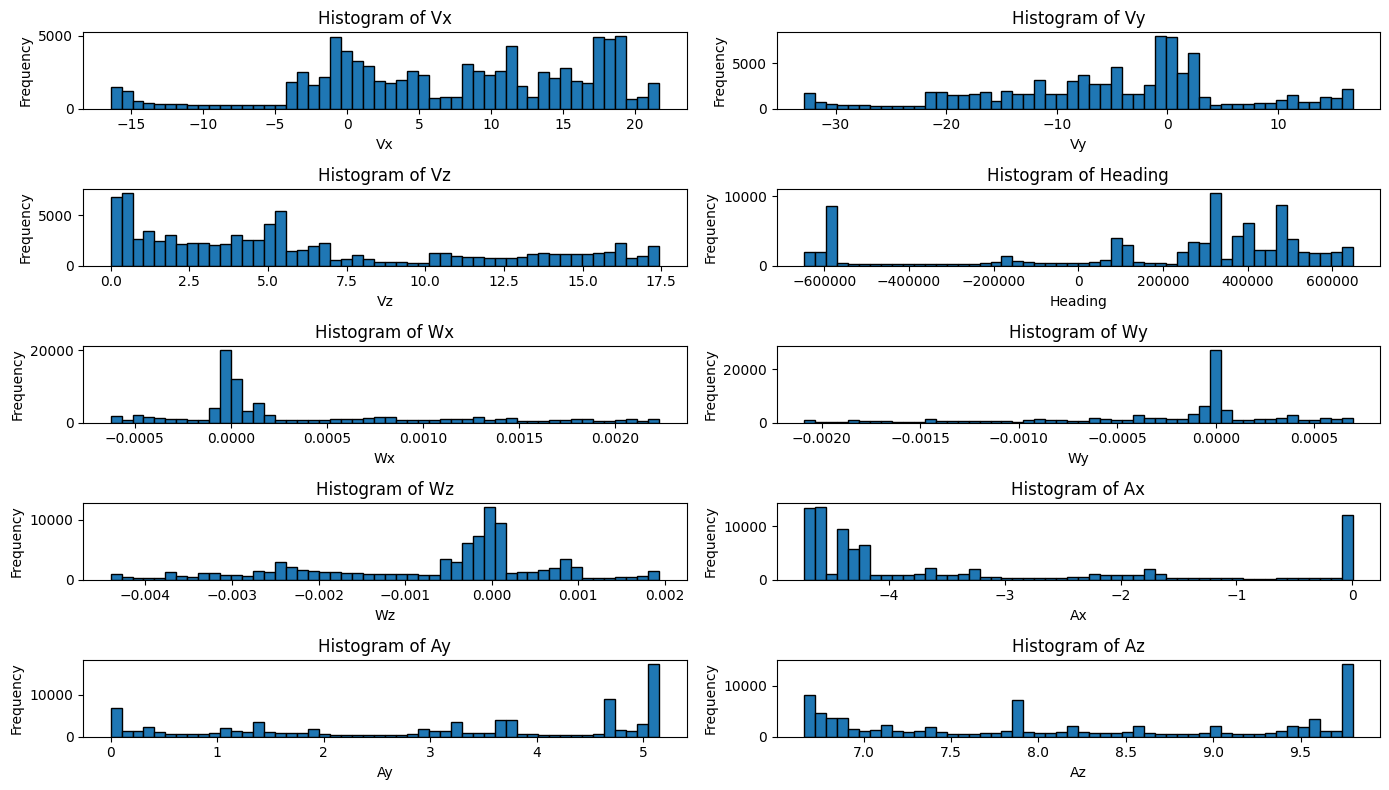

In [13]:
num_features = len(X.columns)
num_rows = (num_features + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(14, 8))

axes = axes.flatten()

for i, column in enumerate(X.columns):
    axes[i].hist(X[column], bins=50, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

# Normalization

In [15]:
for col in tqdm(X.columns):
    mean = X[col].mean()
    std = X[col].std()
    X[col] = X[col].apply(lambda x : (x- mean)/std)

100%|██████████| 10/10 [00:00<00:00, 11.61it/s]


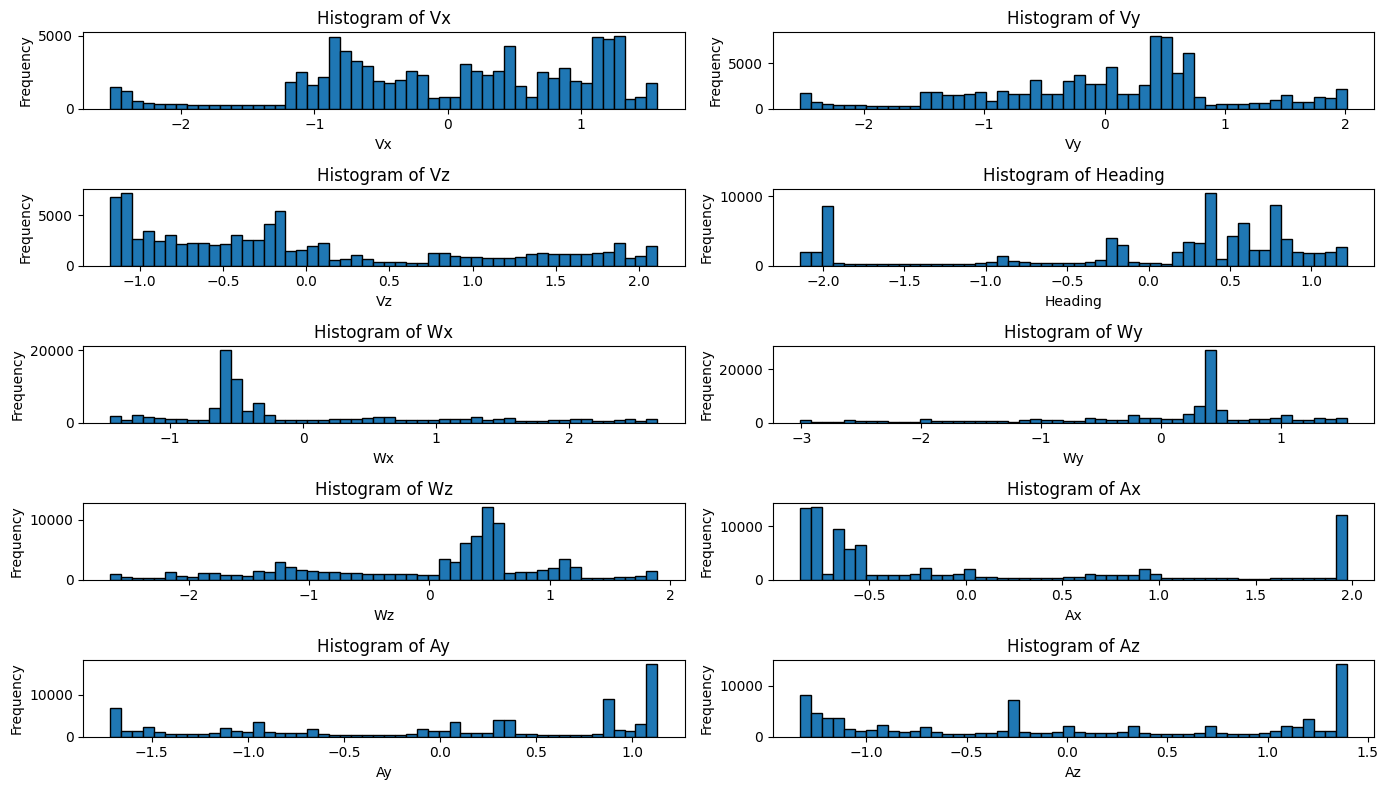

In [16]:
num_features = len(X.columns)
num_rows = (num_features + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(14, 8))

axes = axes.flatten()

for i, column in enumerate(X.columns):
    axes[i].hist(X[column], bins=50, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [17]:
for col in tqdm(y.columns):
    mean = y[col].mean()
    std = y[col].std()
    y[col] = y[col].apply(lambda x : (x- mean)/std)

100%|██████████| 3/3 [00:00<00:00, 11.63it/s]


# Train Test Split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.15,shuffle=False)

In [23]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((76160, 10), (76160, 3), (13440, 10), (13440, 3))

# Model Architecture and Training

In [48]:
model = Sequential([Input(shape=(10,))])
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='linear'))

In [49]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')

In [50]:
model.fit(x_train,y_train,batch_size=64,epochs=20)

Epoch 1/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0882
Epoch 2/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0075
Epoch 3/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0048
Epoch 4/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0037
Epoch 5/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030
Epoch 6/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0027
Epoch 7/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0023
Epoch 8/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0022
Epoch 9/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021
Epoch 10/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0020
Epoch 11/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0016
Epoch 12/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0017
Epoch 13/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0014
Epoch 14/20
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0014
Epoch 15/20
1190/1190 ━━━━━━━

# Evaluation

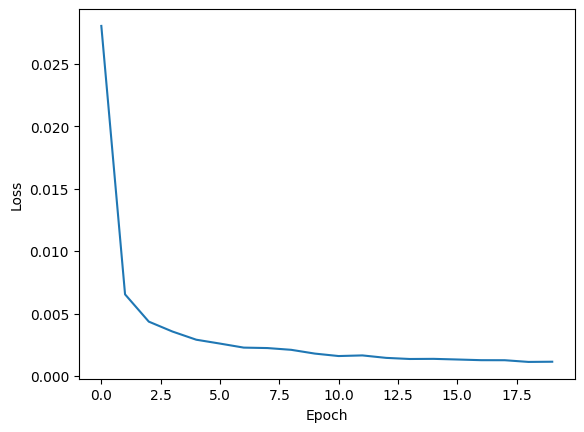

In [51]:
plt.plot(np.arange(0,20,1),model.history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [51]:
model.evaluate(x_test,y_test)

420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0074


0.007458113133907318

In [54]:
pred = model.predict(x_test)

420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [55]:
y_test[:,0].shape,pred[:,0].shape,np.arange(0,y_test.shape[0]).shape

((13440,), (13440,), (13440,))

# Plotting the prediction with True values
Red color presents the predicted values and green presents the Predictions

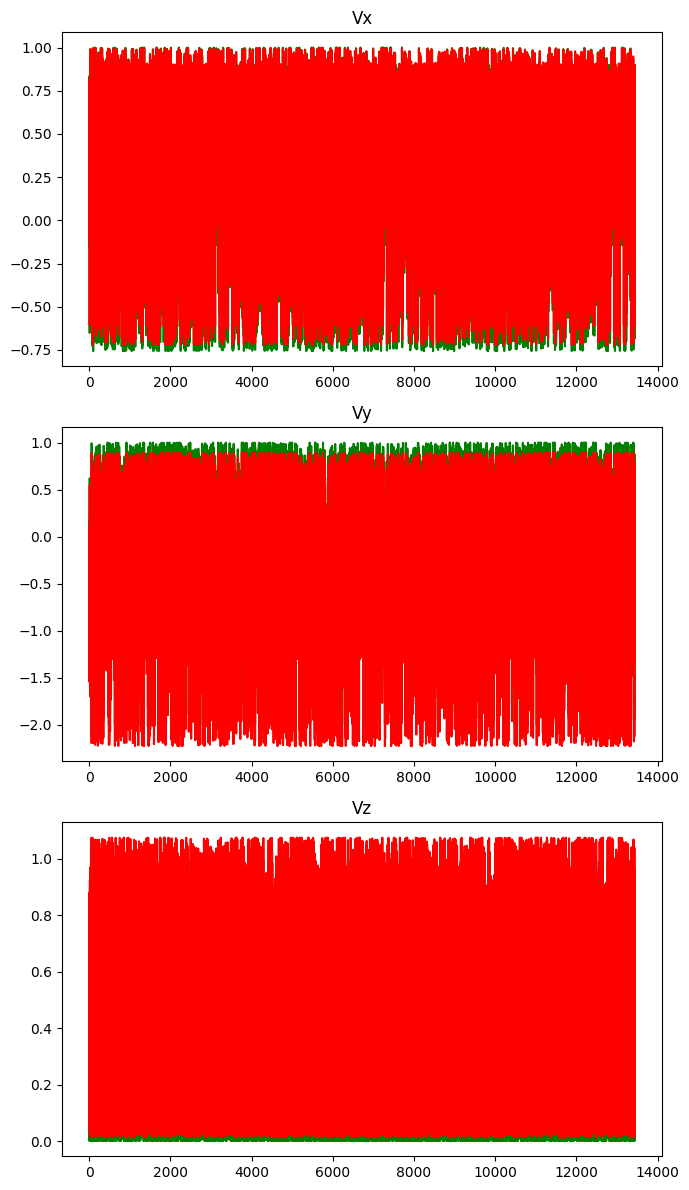

In [106]:
# Plotting at a scale of 89000 values
fig , ax = plt.subplots(3,1,figsize=(7, 12))

ax[0].plot(np.arange(0,y_test.shape[0]),y_test[:,0],c='green') # True values
ax[0].plot(np.arange(0,y_test.shape[0]),pred[:,0],c='red') # Prediction
ax[0].set_title('Vx')

ax[1].plot(np.arange(0,y_test.shape[0]),y_test[:,1],c='green')
ax[1].plot(np.arange(0,y_test.shape[0]),pred[:,1],c='red')
ax[1].set_title('Vy')

ax[2].plot(np.arange(0,y_test.shape[0]),y_test[:,2],c='green')
ax[2].plot(np.arange(0,y_test.shape[0]),pred[:,2],c='red')
ax[2].set_title('Vz')

plt.tight_layout()
plt.show()

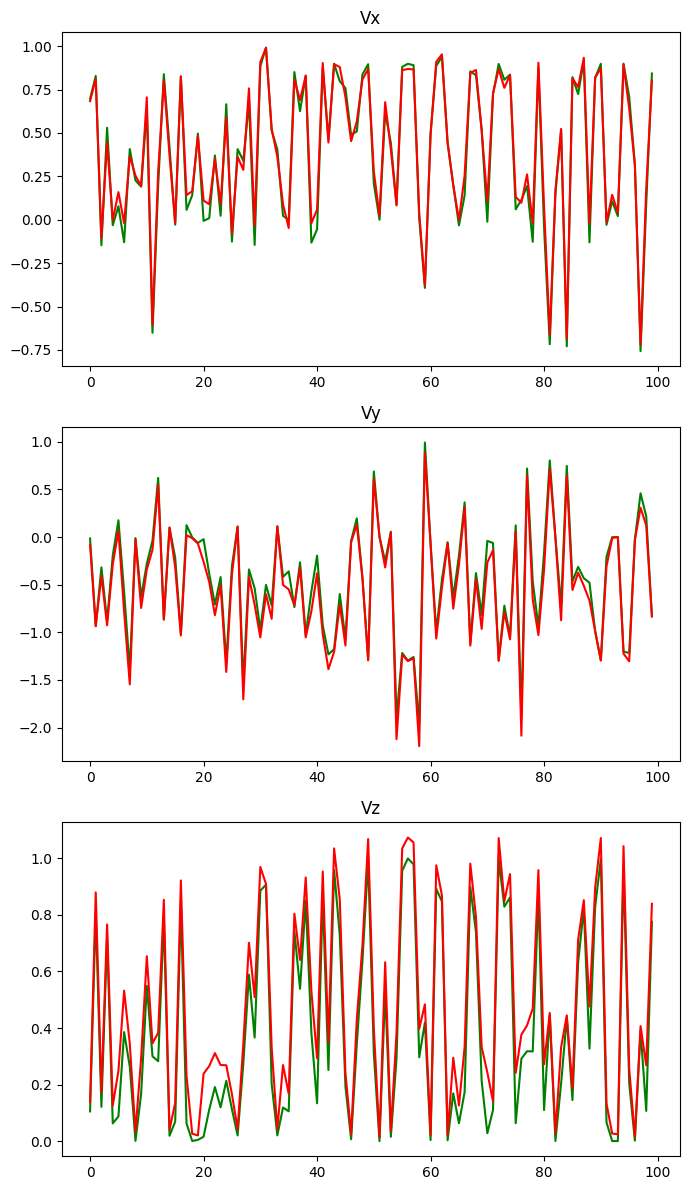

In [99]:
# Plotting at a scale of 100 values
fig , ax = plt.subplots(3,1,figsize=(7, 12))

ax[0].plot(np.arange(0,100),y_test[:100,0],c='green')
ax[0].plot(np.arange(0,100),pred[:100,0],c='red')
ax[0].set_title('Vx')

ax[1].plot(np.arange(0,100),y_test[:100,1],c='green')
ax[1].plot(np.arange(0,100),pred[:100,1],c='red')
ax[1].set_title('Vy')

ax[2].plot(np.arange(0,100),y_test[:100,2],c='green')
ax[2].plot(np.arange(0,100),pred[:100,2],c='red')
ax[2].set_title('Vz')

plt.tight_layout()
plt.show()

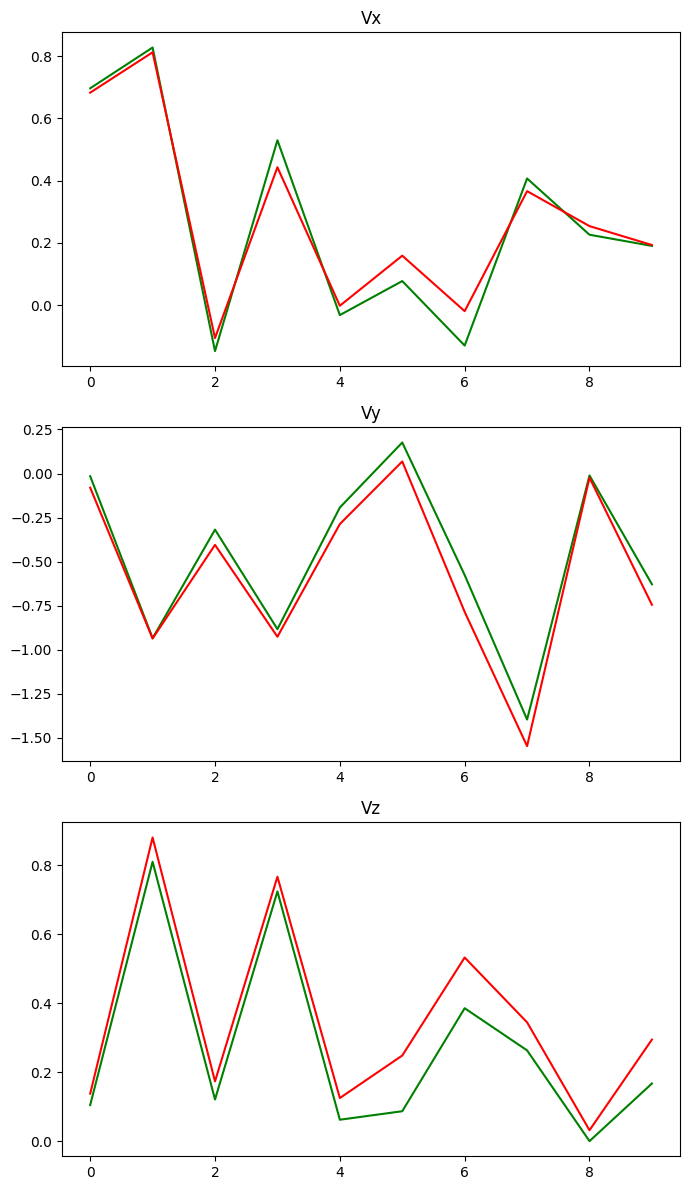

In [100]:
#plotting at a scale of 10 values
fig , ax = plt.subplots(3,1,figsize=(7, 12))

ax[0].plot(np.arange(0,10),y_test[:10,0],c='green')
ax[0].plot(np.arange(0,10),pred[:10,0],c='red')
ax[0].set_title('Vx')

ax[1].plot(np.arange(0,10),y_test[:10,1],c='green')
ax[1].plot(np.arange(0,10),pred[:10,1],c='red')
ax[1].set_title('Vy')

ax[2].plot(np.arange(0,10),y_test[:10,2],c='green')
ax[2].plot(np.arange(0,10),pred[:10,2],c='red')
ax[2].set_title('Vz')

plt.tight_layout()
plt.show()